In [1]:
import random
import math

class FireFly:
    def __init__(self, radius, time_steps, uid, N):
        self.uid = uid
        self.position = (random.uniform(0,1), random.uniform(0,1)) # random position of firefly
        self.neighbours = [] # visible neighbours
        self.r = radius # radius of perception
        self.L = time_steps # time steps
        self.cycle_timer = random.randrange(0,50) # current cycle timer
        self.population_size = N
    ### Perceive neighbours
    def calc_neighbours(self, positions):
        for i in range(self.population_size):
            if i == self.uid:
                continue
            if math.dist(positions[i], self.position) < self.r:
                self.neighbours.append(i)
    ### return own position
    def get_position(self):
        return self.position
    ### is this firefly currently flashing?
    def live(self):
        self.cycle_timer += 1
        if self.cycle_timer > self.L:
            self.cycle_timer = 0
        return self.uid, self.cycle_timer
    ### synch with neighbours
    def synch(self, flashers):
        counter = 0
        for neighbour in self.neighbours:
            if flashers[neighbour]:
                counter += 1
        if counter > len(self.neighbours)/ 2:
            self.cycle_timer += 1
    ### check if flashing
    def flashing(self):
        return self.cycle_timer < self.L/2
    def get_neighbours(self):
        return self.neighbours



After 20 the fireflies are now like this:


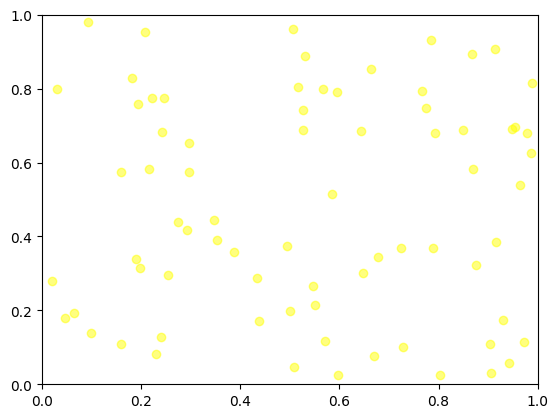

<Figure size 640x480 with 0 Axes>

KeyboardInterrupt: 

In [11]:
### Plot
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

plt.ion()  # interactive mode for Jupyter

# create the figure only once
fig, ax = plt.subplots()
sc = ax.scatter([], [], alpha=0.5, c="yellow")

# set axis limits once
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# function to update the scatter points without recreating the plot
def plot_update(positions, flashing):
    x_values = []
    y_values = []
    for i in range(len(positions)):
        if flashing[i]:
            x_values.append(positions[i][0])
            y_values.append(positions[i][1])

    coords = list(zip(x_values, y_values))
    sc.set_offsets(coords)

    display(fig)
    plt.draw()
    plt.pause(0.001)


# init Variables
N = 150
L = 50
R = [0.05, 0.1, 0.5, 1.4]
steps = 5000

# init fireflies
fireflies = [FireFly(R[0], L, i, N) for i in range(N)]

# get positions of all fireflies
positions = [f.get_position() for f in fireflies]

# calculate neighbours of all fireflies
for f in fireflies:
    f.calc_neighbours(positions)

# live for n steps
for current_step in range(steps):
    synch = [False] * N
    flashing = [False] * N

    for f in fireflies:
        uid, timer = f.live()
        synch[uid] = timer == 0
        flashing[uid] = f.flashing()

    for i in range(N):
        if synch[i]:
            fireflies[i].synch(flashing)
    if current_step%10 == 0:
        display(clear_output(True))
        print(f"After {current_step} the fireflies are now like this:")
        plot_update(positions, flashing)
        time.sleep(2)
